## Installing Tensor

In [ ]:
# Install a pip package in the current Jupyter kernel
import sys

# For google colab
# !python -m pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 -f https://download.pytorch.org/whl/torch_stable.html
# !python -m pip install torchtext==0.12.0 torchaudio==0.11.0

# For Linux and probably Windows (CPU)
# !{sys.executable} -m pip install torch==1.11.0+cpu torchvision==0.12.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

# For Linux and probably Windows (Prerequisites: Nvidia GPU + CUDA toolkit 11.3)
# !{sys.executable} -m pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

# For OS X/Mac
!python3 -m pip install torch==1.11.0 torchvision==0.12.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


## Checking PyTorch Installation and Version

In [ ]:
import torch
import torchvision
print(f"PyTorch version Installed: {torch.__version__}\nTorchvision version Installed: {torchvision.__version__}\n")
if not torch.__version__.startswith("1.11"):
    print("you are using an another version of PyTorch. We expect PyTorch 1.11.0. You may continue using your version but it"
          " might cause dependency and compatibility issues.")
if not torchvision.__version__.startswith("0.12"):
    print("you are using an another version of torchvision. We expect torchvision 0.12. You can continue with your version but it"
          " might cause dependency and compatibility issues.")

/opt/homebrew/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


PyTorch version Installed: 1.11.0
Torchvision version Installed: 0.12.0



# Getting Started

In this section you will learn the basic element Tensor and some simple operations in PyTorch.
The following block imports the required packages for the rest of the notebook.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

%load_ext autoreload
%autoreload 2
%matplotlib inline

# 1. Tensors

[`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) is the central class of PyTorch.
Tensors are similar to NumPy’s ndarrays. The advantage of using Tensors is that one can easily transfer them from CPU to GPU and therefore computations on tensors can be accelerated with a GPU.

##  ** Jupyter notebook에서는 mps 사용중

### 1.1. Initializing 

In [ ]:
# Initializing the Numpy Array
array_np = np.array([[1,2,3],[5,6,7]]) #NumPy array
# Initializing the Tensor
array_ts = torch.tensor([[1,2,3],[4,5,6]]) # Tensor

print("Variable array_np:\nDatatype: {}\nShape: {}".format(type(array_np), array_np.shape))
print("Values:\n", array_np)
print("\n\nVariable array_ts:\nDatatype {}\nShape: {}".format(type(array_ts), array_ts.shape))
print("Values:\n", array_ts)

Variable array_np:
Datatype: <class 'numpy.ndarray'>
Shape: (2, 3)
Values:
 [[1 2 3]
 [5 6 7]]


Variable array_ts:
Datatype <class 'torch.Tensor'>
Shape: torch.Size([2, 3])
Values:
 tensor([[1, 2, 3],
        [4, 5, 6]])


### 1.2. Conversion between Numpy array and Tensor

In [ ]:
# Conversion
array_np = np.array([1, 2, 3])

# Conversion from  a numpy array to a Tensor
array_ts_2 = torch.from_numpy(array_np) 

# Conversion from  Tensor to numpy array
array_np_2 = array_ts_2.numpy() 

# Change a value of the np_array
array_np_2[1] = -1 

# Changes in the numpy array will also change the values in the tensor
assert(array_np[1] == array_np_2[1])

### 1.3. Indexing

In [ ]:
print("array_ts shape :", array_ts.shape)
print(array_ts)

# Let us take the first two columns from the original tensor array and save it in a new one
b = array_ts[:2, :2] 

# Let's assign the value of first column of the new variable to be zero 
b[:, 0] = 0 
print(b)

array_ts shape : torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[0, 2],
        [0, 5]])


In [ ]:
# Index of the elements with value greater than one
mask = array_ts > 1 
new_array = array_ts[mask]
print(new_array)

tensor([2, 3, 5, 6])


In [ ]:
c = array_ts[array_ts>1]

# Is the result same as the array from the previous cell?
print(c == new_array)

tensor([True, True, True, True])


### 1.4. Elementwise operations on Tensor
#### Same for Muliplication, subtraction 
#### Division -> returns float 

In [ ]:
x = torch.tensor([[1,2],[3,4]])
y = torch.tensor([[5,6],[7,8]])

# Elementwise Addition of the tensors
# [[ 6.0  8.0]
#  [10.0 12.0]]

# Addition - Syntax 1
print("x + y: \n{}".format(x + y))

# Addition - Syntax 2
print("x + y: \n{}".format(torch.add(x, y)))

# Addition - Syntax 3
result_add = torch.empty(2, 2)
torch.add(x, y, out=result_add)
print("x + y: \n{}".format(result_add))

x + y: 
tensor([[ 6,  8],
        [10, 12]])
x + y: 
tensor([[ 6,  8],
        [10, 12]])
x + y: 
tensor([[ 6.,  8.],
        [10., 12.]])


In [ ]:
## Numpy Devision 
x_np = np.array([[1,2],[3,4]])
y_np = np.array([[5,6],[7,8]])
print(f"Numpy Division \n {x_np / y_np}\n")

## Tensor Devision 
print("Tensor division")
print(x/y)

Numpy Division 
 [[0.2        0.33333333]
 [0.42857143 0.5       ]]

Tensor division
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])


## 1.5. Devices
`.to` method and
`torch.cuda.is_available()`

When training a neural network, it is important to make sure that all the required tensors as well as the model are on the same device. Tensors can be moved between the CPU and GPU using `.to` method.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

print(f"Original device: {x.device}") # "cpu"

# set device to GPU / CPU
tensor = x.to(device)
print(f"Current device: {tensor.device}") #"cpu" or "cuda"

cpu
Original device: cpu
Current device: cpu


## 1.6. M1 맥북 GPU 설정 

In [ ]:
# print (f"PyTorch version:{torch.__version__}") # 1.12.1 이상
# print(f"MPS 장치를 지원하도록 build 되었는지: {torch.backends.mps.is_built()}") # True 여야 합니다.
# print(f"MPS 장치가 사용 가능한지: {torch.backends.mps.is_available()}") # True 여야 합니다.
# !python -c 'import platform;print(platform.platform())'

PyTorch version:1.11.0


AttributeError: module 'torch.backends' has no attribute 'mps'

In [ ]:
# mps_device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
# print(mps_device)

# print(f"Original device: {x.device}") # "cpu"

# # set device to MPS / CPU
# tensor = x.to(mps_device)
# print(f"Current device: {tensor.device}") #"mps" or "cuda"

# 2. Training a classifier with PyTorch

Now that we are introduced PyTorch tensors, we will look at how to use PyTorch to train neural networks. We will do the following steps:

1. Load data 
2. Define a two-layer network
3. Define a loss function and optimizer
4. Train the network
5. Test the network

## 2.1 dataset and dataloader 
[DATASETS and DATALOADER 공식 문서](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)

The general procedure of loading data is :
- Extract data from  source
- Transform the data into a suitable form (for example, to a Tensor)
- Put our data into an object to make it easy to access further on

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision.transforms as transforms

Specifically for computer vision, the `torchvision` packages has data loaders for many common datasets such
as ImageNet, FashionMNIST, MNIST and additional data transformers for images in `torchvision.datasets` and `torch.utils.data.DataLoader` modules. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset. 

This is highly convenient and is useful in avoiding  to write boilerplate code.

### Defining Transform

[Transforms 공식문서](https://pytorch.org/tutorials/beginner/basics/transforms_tutorial.html)

`transforms.Compose` creates a series of transformation to prepare the dataset.
- `transforms.ToTensor` convert `PIL image` or numpy.ndarray $(H \times W\times C)$ in the range [0,255] to a `torch.FloatTensor` of shape $(C \times H \times W)$ in the range [0.0, 1.0].

- `transforms.Normalize` normalize a tensor image with the provided mean and standard deviation.

- Normalize does the following for each channel: `image = (image - mean) / std`
    - if you would like to get your image back in [0,1] range : `image = ((image * std) + mean)`
    - 여기서 [0,1] 범위로 transform 되었으므로, mean = 0.5, std = 0.5를 통해 [-1, 1] 범위로 변환

In [ ]:
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
# Mean and standard deviations have to be sequences (e.g. tuples),hence we add a comma after the values
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))]) 

In [ ]:
import torchvision

fashion_mnist_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=True,
                                                          download=True, transform=transform)
fashion_mnist_test_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=False,
                                                          download=True, transform=transform)

### 2.1.3 Dataloader 

In [ ]:
from torch.utils.data import DataLoader

In PyTorch we can use the [`DataLoader`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) class to accomplish the same objective. It provides more parameters than our `DataLoader` class, such as easy multiprocessing using `num_workers`. You can refer the documentation to learn those additional features.

In [ ]:
batch_size = 8
fashion_mnist_dataloader = DataLoader(
    fashion_mnist_dataset, 
    batch_size=batch_size)

fashion_mnist_test_dataloader = DataLoader(
    fashion_mnist_test_dataset, 
    batch_size=batch_size)

In [ ]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

### checking `fashion_mnist_data_loader`
Since we loaded the data with `batch_size` 8, the shape of the input is (8, 1, 28, 28). 

##### - shape

In [ ]:
# We can use the exact same way to iterate over samples
for i, item in enumerate(fashion_mnist_dataloader):
    print('Batch {}'.format(i))
    image, label = item
    print(f"Datatype of Image: {type(image)}")
    print(f"Shape of the Image: {image.shape}")
    print(f"Label Values: {label}")

    if i+1 >= 1:
        break

Batch 0
Datatype of Image: <class 'torch.Tensor'>
Shape of the Image: torch.Size([8, 1, 28, 28])
Label Values: tensor([9, 0, 0, 3, 0, 2, 7, 2])


##### - image 

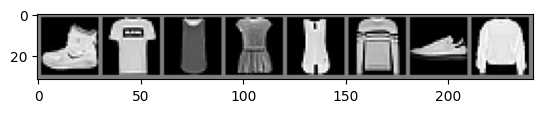

Ankle boot T-shirt/top T-shirt/top Dress T-shirt/top Pullover Sneaker Pullover


In [ ]:
def imshow(img):
    u_img = img * 0.5 + 0.5 # unnormalize
    npimg = u_img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(fashion_mnist_dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

##### - values of each data [ normalized data ]
데이터는 -1 ~ 1 사이 값으로 normalized 되어있음 

In [ ]:
for i, item in enumerate(fashion_mnist_dataloader):
    print(f'첫번째 Batch의 첫번째 데이터 이미지 확인\n')
    print('Batch {}'.format(i))
    image, label = item 
    print(f'image shape: \n {image[1].shape}')
    print(f'\nflattened image shape :\n {image[1].view(-1, 28*28).shape}')
    print(f'\nimage values :\n {image[1].view(-1, 28*28)}')
    print(f'\nimage labels :\n {label[1]}')
    
    if i+1 >= 1:
        break;

첫번째 Batch의 첫번째 데이터 이미지 확인

Batch 0
image shape: 
 torch.Size([1, 28, 28])

flattened image shape :
 torch.Size([1, 784])

image values :
 tensor([[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922, -1.0000, -1.0000,
         -1.0000, -1.0000, -0.6784,  0.4745, -0.1922, -0.5765, -0.6235, -0.6627,
         -0.3176,  0.3176,  0.0431, -0.8745, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.9922,
         -1.0000, -1.0000, -1.0000, -0.6157,  0.0667,  0.7176,  0.6941,  0.7882,
          0.8510,  1.0000,  1.0000,  1.0000,  1.0000,  0.7020,  0.6863,  0.9922,
          0.8118,  0.2549, -0.6471, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -0.8902,  0.3804,  0.7412,
          0.7569,  0.6627,  0.5922,  0.5529,  0.5373,  0.5686,  0.6863,  0.6000,
          0.5843,  0.5765,  0.5765,  0.5765,  0.6392,  0.7098,  0.7569,  0.2863,
         -1.0000, -1.0000, -1.0000, -1.0000, -1.0000

### 3. Defining a Neural Network 
[공식문서-Creating Models](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

To define a neural network in PyTorch, we create a class that inherits from `nn.Module`. We define the layers of the network in the `__init__` function and specify how data will pass through the network in the `forward` function. To accelerate operations in the neural network, we move it to the GPU if available.

Looking at the constructor of `Net`, we have,
 - `super().__init__` creates a class that inherits attributes and behaviors from another class.

 - `self.fc1` creates an affine layer with `input_size` inputs and `hidden_size` outputs.

 - `self.fc2` is the second affine layer.

The `Forward` function defines the forward pass of the mode.:

 - Input `x` is flattened with `x = x.view(-1, self.input_size)` to be able to use as input to the affine layer.
    - 3차원 텐서를 1차원으로 벡터 인풋으로 받음
    - x = nn.Flatten(x)

 - Apply `fc1`, `activation`, `fc2` sequentially to complete the network.
    

In [1]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, activation=nn.Sigmoid(),
                 input_size=1*28*28, hidden_size=100, classes=10):
        
        super(Net, self).__init__()
        self.input_size = input_size

        # Here we initialize our activation and set up our two linear layers
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, classes)

    def forward(self, x):
        x = x.view(-1, self.input_size) # flatten 
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)

        return x

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, activation=nn.Sigmoid(),
                 input_size=1*28*28, hidden_size=100, classes=10):
        
        super(Net, self).__init__()
        self.input_size = input_size

        # Here we initialize our activation and set up our two linear layers
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, classes)

    def forward(self, x):
        x = x.view(-1, self.input_size) # flatten 
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)

        return x

### 3.1. Automatic differentiation with `TORCH.AUTOGRAD`
[공식 웹사이트 동영상/코드](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html)

Central to all neural networks in PyTorch is the [`autograd`](https://pytorch.org/docs/stable/autograd.html) package. It provides automatic differentiation for all operations on Tensors. 
If we set the attribute `.requires_grad` of `torch.Tensor` as `True`, it tracks all operations applied on that tensor. Once all the computations are finished, the function `.backward()` computes the gradients into the `Tensor.grad` variable

<div class="alert alert-block alert-info">
Thanks to the <b>autograd</b> package, we just have to define the <b>forward()</b> function. We can use any of the Tensor operations in the <b>forward()</b>  function.
 The <b>backward()</b> function (where gradients are computed through back-propagation) is automatically defined by PyTorch.
</div>

<div class="alert alert-block alert-info">
    You can set the value of <b>requires_grad</b> when creating a tensor, or later by using <b>x.requires_grad_(True)</b> method.
</div>

### 3.2. Checking model parameters 

We can use `print()` to look at all the defined layers of the network (but it won't show the information of the forward pass).

The learned parameters of a model are returned by `[model_name].parameters()`. We can also access the parameters of different layers by `[model_name].[layer_name].parameters()`.

Let's create an instance of the `Net` model and look at the parameters matrix shape for each of the layers.

In [ ]:
net = Net()
# Always remember to move the network to the GPU/CPU depending on device
net = net.to(device) 

print(net)

print("Shapes of the Parameter Matrix:")
for parameter in net.parameters():
        print(parameter.shape)

Net(
  (activation): Sigmoid()
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
Shapes of the Parameter Matrix:
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


### 3.3. Defining the Loss  Function and Optimizer 
[공식웹사이트](https://tutorials.pytorch.kr/beginner/basics/optimization_tutorial.html)

The `torch.nn` and `torch.optim` modules include a variety of loss functions and optimizers. We will initialize an instance of them.

In [ ]:
from torch import nn 
import torch.optim as optim 

In [ ]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
CrossEntropy = nn.CrossEntropyLoss()

### 3.4. Training the Network 

So the general training pass is summarized below:

- `zero_grad()`: Zero the gradient buffers of all the model parameters to start the current minibatch iteration.

- `y_pred = net(X)`: Make a forward pass through the network by passing the images to the model to get the predictions, which are log probabilities of image belonging to each of the class.

- `loss = CrossEntropy(y_pred, y)`: Calculate the loss from the generated predictions and the training data `y`.

- `loss.backward()`: Perform a backward pass through the network to calculate the gradients for model parameters.

- `optimizer.step()`: Do an optimization step to update the model parameters using the calculated gradients.

We keep tracking the training loss and accuracy over time. The following plot shows average values for train loss and accuracy.

##### device 설정

In [ ]:
# if torch.backends.mps.is_available():
#     device = torch.device('mps:0')
# elif torch.backends.cuda.is_available():
#     device = torch.device('cuda:0')
# else:cpu_device = torch.device('cpu')
print(device)

net = Net()
# Always remember to move the network to the GPU/CPU depending on device
net = net.to(device) 

cpu


In [ ]:
# Initializing the list for storing the loss and accuracy

train_loss_history = [] # loss
train_acc_history = [] # accuracy

for epoch in range(2):

       
    running_loss = 0.0
    correct = 0.0
    total = 0
    
    # Iterating through the minibatches of the data
    
    for i, data in enumerate(fashion_mnist_dataloader, 0):
       
        
        # data is a tuple of (inputs, labels)
        X, y = data

        X = X.to(device)
        y = y.to(device)

        # Reset the parameter gradients  for the current  minibatch iteration 
        optimizer.zero_grad()

        
        y_pred = net(X)             # Perform a forward pass on the network with inputs
        loss = CrossEntropy(y_pred, y) # calculate the loss with the network predictions and ground Truth
        loss.backward()             # Perform a backward pass to calculate the gradients
        optimizer.step()            # Optimize the network parameters with calculated gradients

        
        # Accumulate the loss and calculate the accuracy of predictions
        running_loss += loss.item()
        _, preds = torch.max(y_pred, 1) #convert output probabilities of each class to a singular class prediction
        correct += preds.eq(y).sum().item()
        total += y.size(0)
        

        # Print statistics to console
        if i % 1000 == 999: # print every 1000 mini-batches
            running_loss /= 100
            correct /= total
            print("[Epoch %d, Iteration %5d] loss: %.3f acc: %.2f %%" % (epoch+1, i+1, running_loss, 100*correct))
            train_loss_history.append(running_loss)
            train_acc_history.append(correct)
            running_loss = 0.0
            correct = 0.0
            total = 0

print('FINISH.')

[Epoch 1, Iteration  1000] loss: 23.248 acc: 18.61 %
[Epoch 1, Iteration  2000] loss: 23.244 acc: 18.19 %
[Epoch 1, Iteration  3000] loss: 23.196 acc: 18.93 %
[Epoch 1, Iteration  4000] loss: 23.190 acc: 18.68 %
[Epoch 1, Iteration  5000] loss: 23.233 acc: 18.19 %
[Epoch 1, Iteration  6000] loss: 23.253 acc: 17.65 %
[Epoch 1, Iteration  7000] loss: 23.232 acc: 18.44 %
[Epoch 2, Iteration  1000] loss: 23.248 acc: 18.61 %
[Epoch 2, Iteration  2000] loss: 23.244 acc: 18.19 %
[Epoch 2, Iteration  3000] loss: 23.196 acc: 18.93 %
[Epoch 2, Iteration  4000] loss: 23.190 acc: 18.68 %
[Epoch 2, Iteration  5000] loss: 23.233 acc: 18.19 %
[Epoch 2, Iteration  6000] loss: 23.253 acc: 17.65 %
[Epoch 2, Iteration  7000] loss: 23.232 acc: 18.44 %
FINISH.


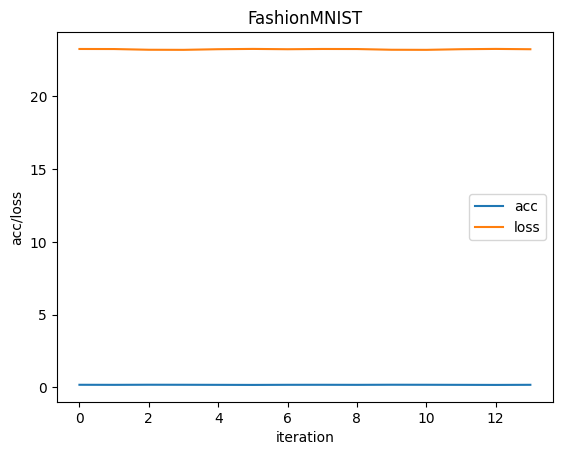

In [ ]:
plt.plot(train_acc_history)
plt.plot(train_loss_history)
plt.title("FashionMNIST")
plt.xlabel('iteration')
plt.ylabel('acc/loss')
plt.legend(['acc', 'loss'])
plt.show()

### Reviewing the previous steps 

###### transfrom 정의

In [ ]:
# Mean and standard deviations have to be sequences (e.g. tuples),hence we add a comma after the values
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))]) 

###### dataset 만들기 ( normalized ) 

In [ ]:
import torchvision

fashion_mnist_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=True,
                                                          download=True, transform=transform)
fashion_mnist_test_dataset = torchvision.datasets.FashionMNIST(root='../datasets', train=False,
                                                          download=True, transform=transform)

###### dataloader 
- dataset 
- batch_size 
- num_workers

In [ ]:
from torch.utils.data import DataLoader

fashion_mnist_dataloader = DataLoader(fashion_mnist_dataset, batch_size=8)
fashion_mnist_test_dataloader = DataLoader(fashion_mnist_test_dataset, batch_size=8)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [ ]:
# We can use the exact same way to iterate over samples
for i, item in enumerate(fashion_mnist_dataloader):
    print('Batch {}'.format(i))
    image, label = item
    print(f"Datatype of Image: {type(image)}")
    print(f"Shape of the Image: {image.shape}")
    print(f"Label Values: {label}")

    if i+1 >= 1:
        break

Batch 0
Datatype of Image: <class 'torch.Tensor'>
Shape of the Image: torch.Size([8, 1, 28, 28])
Label Values: tensor([9, 0, 0, 3, 0, 2, 7, 2])


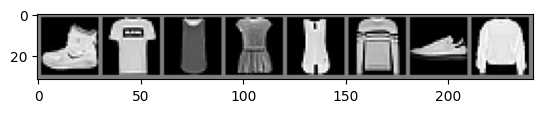

Ankle boot T-shirt/top T-shirt/top Dress T-shirt/top Pullover Sneaker Pullover


In [ ]:
def imshow(img):
    u_img = img / 2 + 0.5 # unormalize
    npimg = u_img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(fashion_mnist_dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

###### Building NN

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self, activation=nn.Sigmoid(),
                 input_size=1*28*28, hidden_size=100, classes=10):
        
        super(Net, self).__init__()
        self.input_size = input_size

        # Here we initialize our activation and set up our two linear layers
        self.activation = activation
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, classes)

    def forward(self, x):
        x = x.view(-1, self.input_size) # flatten 
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)

        return x

######  Optimizer and Loss Function 

In [ ]:
import torch.optim as optim

CrossEntropyLoss = nn.CrossEntropyLoss()
SGD_optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

###### Device 설정

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device('cuda:0')
else: 
    device = torch.device('cpu')
    
print(device)

net = Net()
# Always remember to move the network to the GPU/CPU depending on device
net = net.to(device) 

print(net)

print("Shapes of the Parameter Matrix:")
for parameter in net.parameters():
        print(parameter.shape)

cpu
Net(
  (activation): Sigmoid()
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)
Shapes of the Parameter Matrix:
torch.Size([100, 784])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


###### Train the model 

In [ ]:
train_loss_history = [] # loss 기록
train_acc_history = [] # accuracy 기록

import time
start = time.time()  # 시작 시간 저장

for epoch in range(2):
    
    running_loss = 0.0
    correct = 0.0
    total = 0
    
    # Iterating through the minibatches of the data
    for i, data in enumerate(fashion_mnist_dataloader, 0):
        
        # data is a tuple of (inputs, labels)
        X, y = data
        
#        print(X.shape) # torch.Size([8, 1, 28, 28])
#        print(y.shape) # torch.Size([8])
        
        # set data device  
        X = X.to(device)
        y = y.to(device)
        
        # reset the gradients for the current minibatch 
        SGD_optimizer.zero_grad()
        
        y_pred = net(X)                    # result of the forward network 
        loss = CrossEntropyLoss(y_pred, y) # calculate the loss 
        loss.backward()                    # perform the backward pass of the loss to calculate the gradients 
        optimizer.step()                   # optimize the weights 
        
        
        # Accumulate the loss and calculate the accuracy of predictions
        running_loss += loss.item()
        _, preds = torch.max(y_pred, 1) # convert output probabilities of each class to a singular class prediction
                                        # returns a tuple (values, indices) 
                                        # preds = indices -> 클래스                         
        correct += preds.eq(y).sum().item() 
                                        # .item() : returns the standard python number 
#         print(f'preds : {preds}')
#         print(f'y     : {y}')
        
        total += y.size(0)  
#         print(y)         # tensor([5, 5, 0, 9, 5, 5, 7, 9], device='mps:0')
#         print(y.size())  # torch.Size([8]) 
#         print(y.size(0)) # 8
        
        # Print statistics to console
        if i % 1000 == 999: # print every 1000 mini-batches
            running_loss /= 100
            correct /= total
            print("[Epoch %d, Iteration %5d] loss: %.3f acc: %.2f %%" % (epoch+1, i+1, running_loss, 100*correct))
            train_loss_history.append(running_loss)
            train_acc_history.append(correct)
            running_loss = 0.0
            correct = 0.0
            total = 0

print('FINISH.')
print("time :", time.time() - start)  # 현재시각 - 시작시간 = 실행 시간

[Epoch 1, Iteration  1000] loss: 23.219 acc: 10.84 %
[Epoch 1, Iteration  2000] loss: 23.280 acc: 9.80 %
[Epoch 1, Iteration  3000] loss: 23.226 acc: 9.89 %
[Epoch 1, Iteration  4000] loss: 23.224 acc: 10.05 %
[Epoch 1, Iteration  5000] loss: 23.265 acc: 9.98 %


KeyboardInterrupt: 

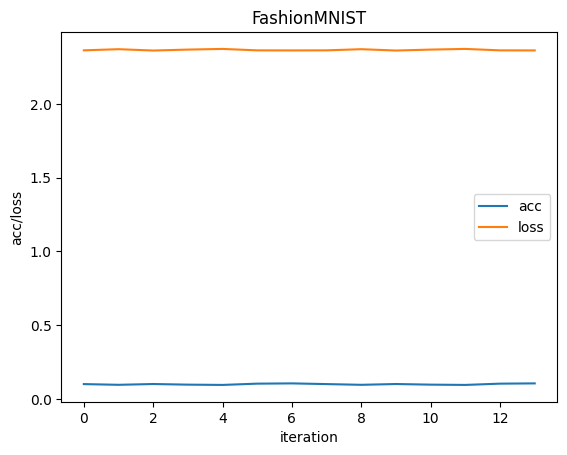

In [ ]:
plt.plot(train_acc_history)
plt.plot(train_loss_history)
plt.title("FashionMNIST")
plt.xlabel('iteration')
plt.ylabel('acc/loss')
plt.legend(['acc', 'loss'])
plt.show()